# MANGOPY
This tutorial will go over the basic functions of the mangopy package.

There are two main classes in the mangopy package:
* Mango - for getting and plotting data for individual imagers
* Mosaic - for creating and plotting combined mosaics of all the imagers

## Mango
First, import the Mango class.

In [1]:
from mangopy.mango import Mango
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Now, instantiate a Mango object.  There are no required inputs, but you can optionally specify the directory your MANGO data is stored in using the ```datadir``` keyword.  By default, mangopy assumes data is stored in the ```MANGOData``` directory, in the same location as the ```MANGO``` repository.

In [2]:
m = Mango()

Specify what site you would like to look at.

In [3]:
site = m.get_site_info('Capitol Reef Field Station')

Now set a datetime object and view the image from that time.

    Successfully downloaded: CAug1314.h5


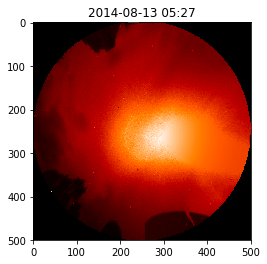

In [5]:
import datetime as dt
time0 = dt.datetime(2014,8,13,5,30)
m.plot(site,time0)

You can also show the site on a map.

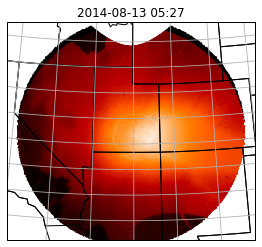

In [6]:
m.map(site,time0)

## Mosaic
Now, import the Mosaic class.

In [7]:
from mangopy.mosaic import Mosaic

Now instantiate the Mosaic class.  By default, Mosaic will try to use all cameras in the MANGO network, but you can specify a list of only certain sites using the ```sites``` keyword.

In [8]:
m = Mosaic()

Now plot a mosaic image of the entire network for the same time specified above.

Hat Creek Observatory
Requested URL does not exist! This probably means there is no data available for the date/site requested.
Capitol Reef Field Station
Bridger
Requested URL does not exist! This probably means there is no data available for the date/site requested.
Eastern Iowa Observatory
Requested URL does not exist! This probably means there is no data available for the date/site requested.
Millstone Hill Observatory
[Errno 2] No such file or directory: '/Users/e30737/Desktop/Projects/InGeO/MANGO/MANGOData/Millstone Hill Observatory/Aug1314'
Pisgah Astronomical Observatory
[Errno 2] No such file or directory: '/Users/e30737/Desktop/Projects/InGeO/MANGO/MANGOData/Pisgah Astronomical Observatory/Aug1314'
Rainwater Observatory
Requested URL does not exist! This probably means there is no data available for the date/site requested.
Madison
Requested URL does not exist! This probably means there is no data available for the date/site requested.
McDonald Observatory
[Errno 2] No such f

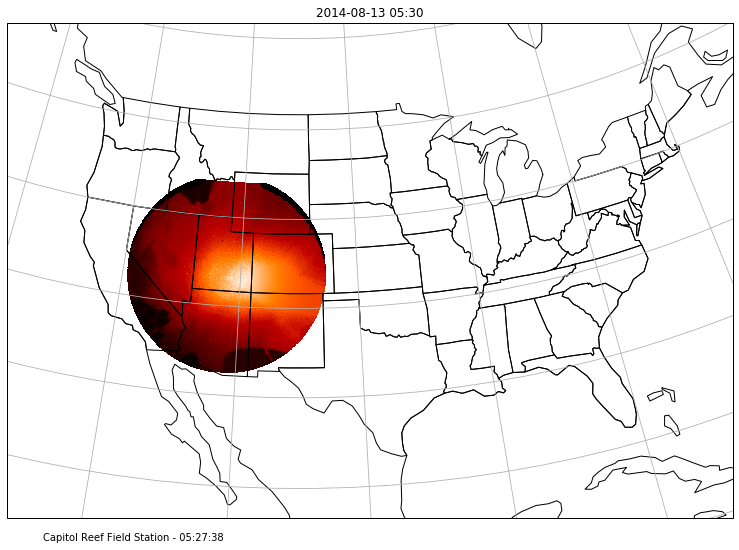

In [9]:
m.plot_mosaic(time0)